In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bridgestan as bs
from posteriordb import PosteriorDatabase

from mcmctoolbox.functoolbox import flat

import emcee

In [2]:
# Load DataBase Locally
pdb_path = "/home/congye/Code/PythonProjects/LearningAdaptiveMCMC/Python/posteriordb/posterior_database"
my_pdb = PosteriorDatabase(pdb_path)

# Load Dataset
posterior = my_pdb.posterior("test-SimpleEggBox-test-SimpleEggBox")
stan_code = posterior.model.stan_code_file_path()
# stan_data = json.dumps(posterior.data.values())
stan_data = json.dumps({"sigma": 1, "r": 20})
model = bs.StanModel.from_stan_file(stan_code, stan_data)

# Gold Standard
gs = posterior.reference_draws()
df = pd.DataFrame(gs)
gs_chains = np.zeros((sum(flat(posterior.information['dimensions'].values())),\
                       posterior.reference_draws_info()['diagnostics']['ndraws']))
for i in range(len(df.keys())):
    s = []
    for j in range(len(df[df.keys()[i]])):
        s += df[df.keys()[i]][j]
    gs_chains[i, :] = s
linv = np.linalg.inv(np.cov(gs_chains))

# Extract log-P-pdf and its gradient
log_p = model.log_density
grad_log_p = lambda x: model.log_density_gradient(x)[1]

In [3]:
nits = 100_000
ndim, nwalkers = 2, 5
p0 = np.array(
    [
        [ 0.0,  0.0],
        [ 0.1,  0.1],
        [ 0.1, -0.1],
        [-0.1,  0.1],
        [-0.1, -0.1]
        ]
        )

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_p)
sampler.run_mcmc(initial_state=p0, nsteps=nits)

State([[ 20.30687753 -21.65256608]
 [ 21.44451875  18.63570754]
 [-17.8056884   18.84218933]
 [ 20.45306557  19.70063513]
 [-18.68732457 -19.28304813]], log_prob=[-3.25045129 -3.81184124 -4.91564155 -1.98532093 -2.95644546], blobs=None, random_state=('MT19937', array([1372071358, 3777654738,  365839214, 3980661542,  745727749,
       4196504431, 1515253956, 1746021805,  862194874, 1543841643,
       4124949262, 2623668646, 2062232202, 2522397889, 3680497825,
       4129386441, 4187525091, 1527248132, 2605505412,   45254579,
        101233162,  697361416, 1162563448,  336814777, 4042696265,
       1625293609, 3342164685,  788879624, 2639393775, 3884083664,
       1472749723, 2021743342, 4173750641, 4283535509, 3933566746,
        793171332,  952581523,  477525087, 1243299180, 1904119042,
       2528325039, 1296731460,  861545045,  482137559,  247513295,
       3684492929, 4001909560, 1346348267, 4126510520, 2135494909,
       4185887138, 1921726513, 4242351406,  347034346, 4032765770,
 

In [4]:
samples = sampler.get_chain(flat=False)

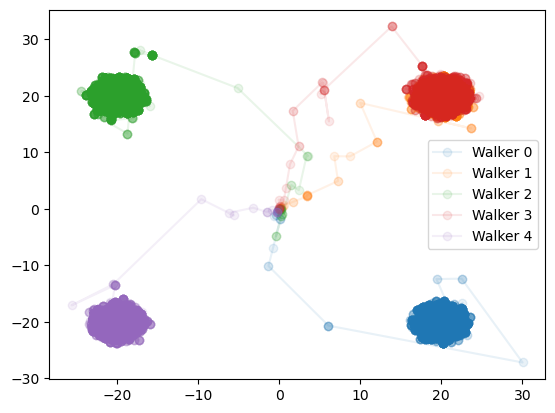

In [11]:
plt.plot(samples[:, 0, 0], samples[:, 0, 1], 'o-', alpha=0.1, label="Walker 0")
plt.plot(samples[:, 1, 0], samples[:, 1, 1], 'o-', alpha=0.1, label="Walker 1")
plt.plot(samples[:, 2, 0], samples[:, 2, 1], 'o-', alpha=0.1, label="Walker 2")
plt.plot(samples[:, 3, 0], samples[:, 3, 1], 'o-', alpha=0.1, label="Walker 3")
plt.plot(samples[:, 4, 0], samples[:, 4, 1], 'o-', alpha=0.1, label="Walker 4")
plt.legend()
plt.show()